Q1) Imagine you are working as a data scientist in an insurance company in the USA. The company has collected the data of earlier travel insurance buyers. In this season of vacation, the company wants to know which person will claim their travel insurance and who will not. The company has chosen you to apply your Machine Learning knowledge and provide them with a model that achieves this vision.


In [1]:
import pandas as pd
import numpy as np

In [2]:
obj1 = pd.read_csv('project_Training_set.csv')
obj1.head(8)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
5,EPX,Travel Agency,Online,2 way Comprehensive Plan,36,"KOREA, REPUBLIC OF",47.0,0.00,NaN,36,0
6,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,THAILAND,25.0,0.00,NaN,36,0
7,EPX,Travel Agency,Online,Cancellation Plan,4,VIET NAM,27.0,0.00,NaN,35,0


In [3]:
obj1.shape

(48260, 11)

In [4]:
obj1.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age', 'Claim'],
      dtype='object')

In [5]:
obj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [6]:
obj1['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [7]:
# Using label binarizer on column Agency Type
# Agency Type : 1 for travel agency , 0 for Airines
from sklearn import preprocessing
lb1 = preprocessing.LabelBinarizer()
obj1['Agency Type'] = lb1.fit_transform(obj1['Agency Type']) 
obj1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,1,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,1,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,1,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,0,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,1,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [8]:
obj1['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [9]:
# Using label bbinarizer on column Distribution Channel
# Distribution Channel : 1 for Online , 0 for Offline
obj1['Distribution Channel'] = lb1.fit_transform(obj1['Distribution Channel'])
obj1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,1,1,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,1,1,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,1,1,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,0,1,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,1,1,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [10]:
obj1.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [11]:
obj1.shape

(48260, 11)

In [12]:
obj1.Gender.unique()

array([nan, 'M', 'F'], dtype=object)

In [13]:
#dropping column gender
obj1.drop('Gender',axis = 1,inplace = True)
obj1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CWT,1,1,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29,0
1,EPX,1,1,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36,0
2,EPX,1,1,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25,0
3,C2B,0,1,Silver Plan,14,SINGAPORE,54.5,13.63,24,0
4,EPX,1,1,Cancellation Plan,90,VIET NAM,10.0,0.00,23,0


In [14]:
obj1.describe()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,0.723518,0.982884,49.546602,40.747647,9.811735,39.927269,0.014671
std,0.447262,0.129704,104.828147,48.823217,19.695339,14.027329,0.120231
min,0.000000,0.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,18.000000,0.000000,35.000000,0.000000
50%,1.000000,1.000000,22.000000,27.000000,0.000000,36.000000,0.000000
75%,1.000000,1.000000,53.000000,48.000000,11.630000,43.000000,0.000000
max,1.000000,1.000000,4881.000000,666.000000,262.760000,118.000000,1.000000


In [15]:
# definining a function to make age groups as children, adults and senior

def age_convert(age):
    result = ''
    if(age <= 21):
        result = 'Child'
    elif(age <= 50):
        result = 'Adult'
    else:
        result = 'Senior'
    return result

In [16]:
# Add a new column in the Database as Age Group through function
# Considering a fact that one can book a ticket 1 year in advance so we will say that the maximum duration 
# of the insurance cannot be more than 731 days(365 + 366 days considering if it is a leap year)

def data_pre_processing(df):

    df['Age Group'] = df['Age'].map(lambda x: age_convert(x))
    # Since the minimum duration that any travel can have is 1 day thus we impute it by the column median.
    df['Duration'][df['Duration'] < 0] = df['Duration'].median()

    # As we observed duration of any travel cannot be more than 731 we will impute it as 731.
    df['Duration'][df['Duration'] > 731] = 731
    
    # replacing the values that is greater than 99 with the mean of Senior Age
    df['Age'][df['Age'] > 99] = df[df['Age Group'] == 'Senior']['Age'].mean()

In [17]:
data_pre_processing(obj1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] < 0] = df['Duration'].median()
C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] > 731] = 731
C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

In [18]:
obj1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age Group
0,CWT,1,1,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29.0,0,Adult
1,EPX,1,1,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36.0,0,Adult
2,EPX,1,1,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25.0,0,Adult
3,C2B,0,1,Silver Plan,14,SINGAPORE,54.5,13.63,24.0,0,Adult
4,EPX,1,1,Cancellation Plan,90,VIET NAM,10.0,0.00,23.0,0,Adult


In [19]:
obj1.describe()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,0.723518,0.982884,48.545089,40.747647,9.811735,39.112609,0.014671
std,0.447262,0.129704,74.660271,48.823217,19.695339,10.556038,0.120231
min,0.000000,0.000000,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,18.000000,0.000000,35.000000,0.000000
50%,1.000000,1.000000,22.000000,27.000000,0.000000,36.000000,0.000000
75%,1.000000,1.000000,53.000000,48.000000,11.630000,43.000000,0.000000
max,1.000000,1.000000,731.000000,666.000000,262.760000,88.000000,1.000000


In [20]:
# Finding the Agencies with the Maximum Claims

Claim_mean = (obj1.groupby('Agency', as_index=False)['Claim'].mean()).nlargest(10,'Claim')
Claim_mean

,Agency,Claim
2,C2B,0.066083
11,LWC,0.045113
15,TTW,0.041667
10,KML,0.020478
4,CCR,0.019355
5,CSR,0.015152
6,CWT,0.010043
8,JWT,0.006897
7,EPX,0.005803
9,JZI,0.005154


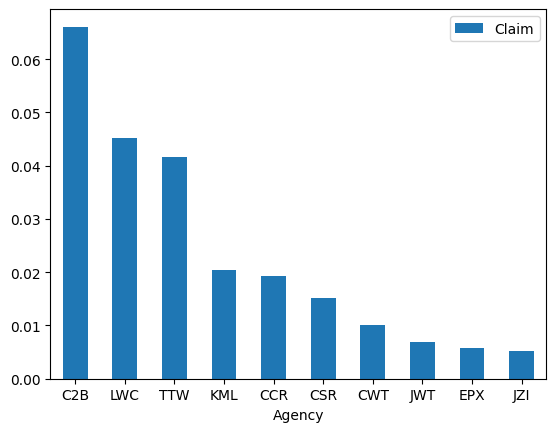

In [21]:
ax = Claim_mean.plot.bar(x='Agency', y='Claim', rot=0)

In [22]:
netsales_mean = (obj1.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,108.311748
15,TTW,92.930556
2,C2B,79.802704
10,KML,55.641638
0,ADM,54.946429
8,JWT,52.950000
6,CWT,42.561564
7,EPX,32.616652
9,JZI,32.430221
5,CSR,31.757576


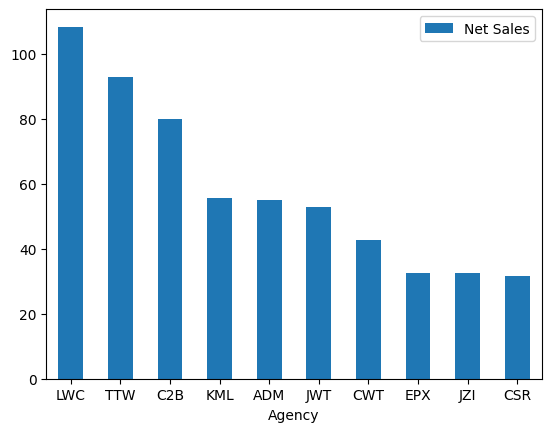

In [23]:
ax1 = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0)

In [24]:
obj1.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'mean')

,Net Sales
Product Name,
1 way Comprehensive Plan,27.611952
2 way Comprehensive Plan,42.734400
24 Protect,21.930383
Annual Gold Plan,344.321854
Annual Silver Plan,217.852509
Annual Travel Protect Gold,247.020779
Annual Travel Protect Platinum,334.134722
Annual Travel Protect Silver,204.951562
Basic Plan,26.502732


In [25]:
obj1.pivot_table(index = ['Age Group'], values = ['Net Sales'], aggfunc = 'count')

,Net Sales
Age Group,
Adult,40833
Child,605
Senior,6822


In [26]:
obj1.groupby('Age Group')['Claim'].value_counts()

Age Group  Claim
Adult      0        40242
           1          591
Child      0          592
           1           13
Senior     0         6718
           1          104
Name: count, dtype: int64

In [27]:
obj1.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age Group
0,CWT,1,1,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29.0,0,Adult
1,EPX,1,1,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36.0,0,Adult
2,EPX,1,1,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25.0,0,Adult
3,C2B,0,1,Silver Plan,14,SINGAPORE,54.5,13.63,24.0,0,Adult
4,EPX,1,1,Cancellation Plan,90,VIET NAM,10.0,0.00,23.0,0,Adult


In [28]:
def feature_processing(df):
    # Converting all categorical columns into numeric using frequency encoding, label encoding and one-hot encoding.
    fe = df.groupby('Destination').size()/len(df)
    df.loc[:,'Dest_fe'] = df['Destination'].map(fe)
    fe_1 = df.groupby('Agency').size()/len(df)
    df.loc[:,'Agency_fe'] = df['Agency'].map(fe_1)
    fe_2 = df.groupby('Product Name').size()/len(df)    
    df.loc[:,'Product Name_fe'] = df['Product Name'].map(fe_2)
    df.drop(columns='Agency',axis=1,inplace=True)
    df.drop(columns='Destination',axis=1,inplace=True)
    df.drop(columns='Product Name',axis=1,inplace=True)
    df.drop(columns='Age Group',axis=1,inplace=True)

In [29]:
feature_processing(obj1)

In [30]:
obj1.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Dest_fe,Agency_fe,Product Name_fe
0,1,1,61,19.8,11.88,29.0,0,0.020576,0.136179,0.136179
1,1,1,93,63.0,0.00,36.0,0,0.008869,0.553502,0.294281
2,1,1,22,22.0,0.00,25.0,0,0.040282,0.553502,0.207211
3,0,1,14,54.5,13.63,24.0,0,0.208620,0.130128,0.035329
4,1,1,90,10.0,0.00,23.0,0,0.026855,0.553502,0.294281


In [31]:
obj1.columns

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim', 'Dest_fe', 'Agency_fe',
       'Product Name_fe'],
      dtype='object')

In [32]:
A = obj1[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Dest_fe', 'Agency_fe',
       'Product Name_fe']]
B = obj1.Claim

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(A,B, train_size = 0.7, random_state = 7)

# MAKING PREDICTIONS ON THE TRAINING DATASET

# Using Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy Score (RANDOM FOREST CLASSIFIER) : ",accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Accuracy Score (RANDOM FOREST CLASSIFIER) :  0.9836994059953033
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14272
           1       0.21      0.05      0.09       206

    accuracy                           0.98     14478
   macro avg       0.60      0.53      0.54     14478
weighted avg       0.98      0.98      0.98     14478



In [37]:
print("Confusion Matrix : \n",confusion_matrix(Y_test,y_pred_rf))

Confusion Matrix : 
 [[14231    41]
 [  195    11]]


 # Using Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
print("Accuracy Score (Logistic Regression): ",accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy Score (Logistic Regression):  0.9856333747755215
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14272
           1       0.00      0.00      0.00       206

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478



In [40]:
print("Confusion Matrix : \n",confusion_matrix(Y_test,y_pred))

Confusion Matrix : 
 [[14270     2]
 [  206     0]]


# IMPORTING THE TESTING DATASET

In [41]:
obj2 = pd.read_csv('project_test_set.csv')
obj2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [42]:
obj2.shape

(15832, 10)

In [43]:
obj2.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [44]:
obj2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                4546 non-null   object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


# Converting the non-numeric columns into numeric columns and dropping the unusable columns

In [45]:
#Using the label binarizer on column agency type
# Agency Type : 1 for travel agency , 0 for Airines
obj2['Agency Type']=lb1.fit_transform(obj2['Agency Type'])
obj2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,1,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,1,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,1,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,1,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,1,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [46]:
# Using label bbinarizer on column Distribution Channel
# Distribution Channel : 1 for Online , 0 for Offline
obj2['Distribution Channel']=lb1.fit_transform(obj2['Distribution Channel'])
obj2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,1,1,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,1,1,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,1,1,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,1,1,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,1,1,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [47]:
#dropping column gender
obj2.drop('Gender',axis = 1,inplace = True)
obj2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,EPX,1,1,Cancellation Plan,24,HONG KONG,27.0,0.0,36
1,EPX,1,1,Cancellation Plan,51,JAPAN,45.0,0.0,36
2,EPX,1,1,Cancellation Plan,52,JAPAN,21.0,0.0,21
3,EPX,1,1,Cancellation Plan,89,SINGAPORE,11.0,0.0,30
4,EPX,1,1,Cancellation Plan,5,MALAYSIA,10.0,0.0,33


Reusing the function data_pre_processing() created before

In [48]:
data_pre_processing(obj2)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] < 0] = df['Duration'].median()
C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] > 731] = 731
C:\Users\harsh\AppData\Local\Temp\ipykernel_2532\52541083.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

In [49]:
obj2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Age Group
0,EPX,1,1,Cancellation Plan,24,HONG KONG,27.0,0.0,36.0,Adult
1,EPX,1,1,Cancellation Plan,51,JAPAN,45.0,0.0,36.0,Adult
2,EPX,1,1,Cancellation Plan,52,JAPAN,21.0,0.0,21.0,Child
3,EPX,1,1,Cancellation Plan,89,SINGAPORE,11.0,0.0,30.0,Adult
4,EPX,1,1,Cancellation Plan,5,MALAYSIA,10.0,0.0,33.0,Adult


Reusing the function feature_processing() created before

In [50]:
feature_processing(obj2)

In [51]:
obj2.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Dest_fe,Agency_fe,Product Name_fe
0,1,1,24,27.0,0.0,36.0,0.038340,0.557542,0.293204
1,1,1,51,45.0,0.0,36.0,0.031203,0.557542,0.293204
2,1,1,52,21.0,0.0,21.0,0.031203,0.557542,0.293204
3,1,1,89,11.0,0.0,30.0,0.211091,0.557542,0.293204
4,1,1,5,10.0,0.0,33.0,0.095945,0.557542,0.293204


In [52]:
obj2.describe()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Dest_fe,Agency_fe,Product Name_fe
count,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000
mean,0.726377,0.981683,48.091776,40.616091,9.790929,39.289077,0.084223,0.356750,0.166396
std,0.445832,0.134100,74.066846,49.031862,20.050776,10.577987,0.071610,0.227432,0.101846
min,0.000000,0.000000,0.000000,-357.500000,0.000000,1.000000,0.000063,0.001326,0.000126
25%,0.000000,1.000000,9.000000,18.000000,0.000000,35.000000,0.031203,0.132264,0.065627
50%,1.000000,1.000000,22.000000,26.000000,0.000000,36.000000,0.058552,0.557542,0.210144
75%,1.000000,1.000000,53.000000,48.000000,10.640000,44.000000,0.095945,0.557542,0.293204
max,1.000000,1.000000,731.000000,810.000000,283.500000,85.000000,0.211091,0.557542,0.293204


In [53]:
obj2.columns

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Dest_fe', 'Agency_fe',
       'Product Name_fe'],
      dtype='object')

In [54]:
obj2.shape

(15832, 9)

In [55]:
obj1.shape

(48260, 10)

# Using train_test_split

Since the number of rows are different, we will select the same number of rows from the training dataset obj1.
The one column that is less is the Claim column as the provided tesing dataset does not contain that column (Target Label) is missing in the testing dataset.
So that's not an issue as the Claim column (Target Label) is available in the training dataset

In [56]:
A1 = obj2[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Dest_fe', 'Agency_fe',
       'Product Name_fe']]

# selecting 15832 rows from Claim column of Training dataset to train our model
# to make predictions for the Tesing dataset 
B1 = obj1.loc[11346:27177,'Claim']

In [57]:
len(A1)

15832

In [58]:
len(B1)

15832

In [59]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(A1,B1, train_size = 0.7, random_state = 7)

# MAKING PREDICTIONS ON THE TESTING DATASET

# Using Random Forest Classifier

In [60]:
rf1 = RandomForestClassifier()
rf1.fit(X_train1, Y_train1)
y_pred_rf1 = rf1.predict(X_test1)

In [61]:
# Check Accuracy here
accuracy_score(Y_test1,y_pred_rf1)

0.9814736842105263

# Using Logistic Regression

In [62]:
lr1 = LogisticRegression()
lr1.fit(X_train1,Y_train1)
y_pred1 = lr1.predict(X_test1)

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Check Accuracy here
accuracy_score(Y_test1,y_pred1)

0.9829473684210527